In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm

In [2]:
path="/lustre/ytzheng/"
# path="C:/data/SAM_cases/"
Casename = 'ASTEX_cold2.6'
Casename1 = 'ASTEX_warm2.6'

f = xr.open_mfdataset(path + Casename + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f1 = xr.open_mfdataset(path + Casename1 + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)

In [4]:
z = f['z']/1000.

myfontsize = 12

f = f.isel(time = 30)
f1 = f1.isel(time = 30)

In [5]:
f

<xarray.Dataset>
Dimensions:               (z: 512)
Coordinates:
  * z                     (z) float32 10.5 22.5 37.5 ... 4055.5 4182.2 4320.9
    time                  float32 166.27083
Data variables:
    p                     (z) float32 dask.array<chunksize=(512,), meta=np.ndarray>
    SST                   float32 dask.array<chunksize=(), meta=np.ndarray>
    Ps                    float32 dask.array<chunksize=(), meta=np.ndarray>
    CLDSHD                float32 dask.array<chunksize=(), meta=np.ndarray>
    AREAPREC              float32 dask.array<chunksize=(), meta=np.ndarray>
    CLD245                float32 dask.array<chunksize=(), meta=np.ndarray>
    WMAX                  float32 dask.array<chunksize=(), meta=np.ndarray>
    UMAX                  float32 dask.array<chunksize=(), meta=np.ndarray>
    PREC                  float32 dask.array<chunksize=(), meta=np.ndarray>
    LHF                   float32 dask.array<chunksize=(), meta=np.ndarray>
    SHF                   flo

In [10]:
print(f.isel(z = slice(0,2)).RADLWUP.values)
print(f.isel(z = slice(0,2)).RADLWDN.values)

[424.6458  423.36197]
[397.4167  396.07538]


In [11]:
print(f1.isel(z = slice(0,2)).RADLWUP.values)
print(f1.isel(z = slice(0,2)).RADLWDN.values)

[388.85895 390.61237]
[383.56345 384.1983 ]


(380.0, 395.0)

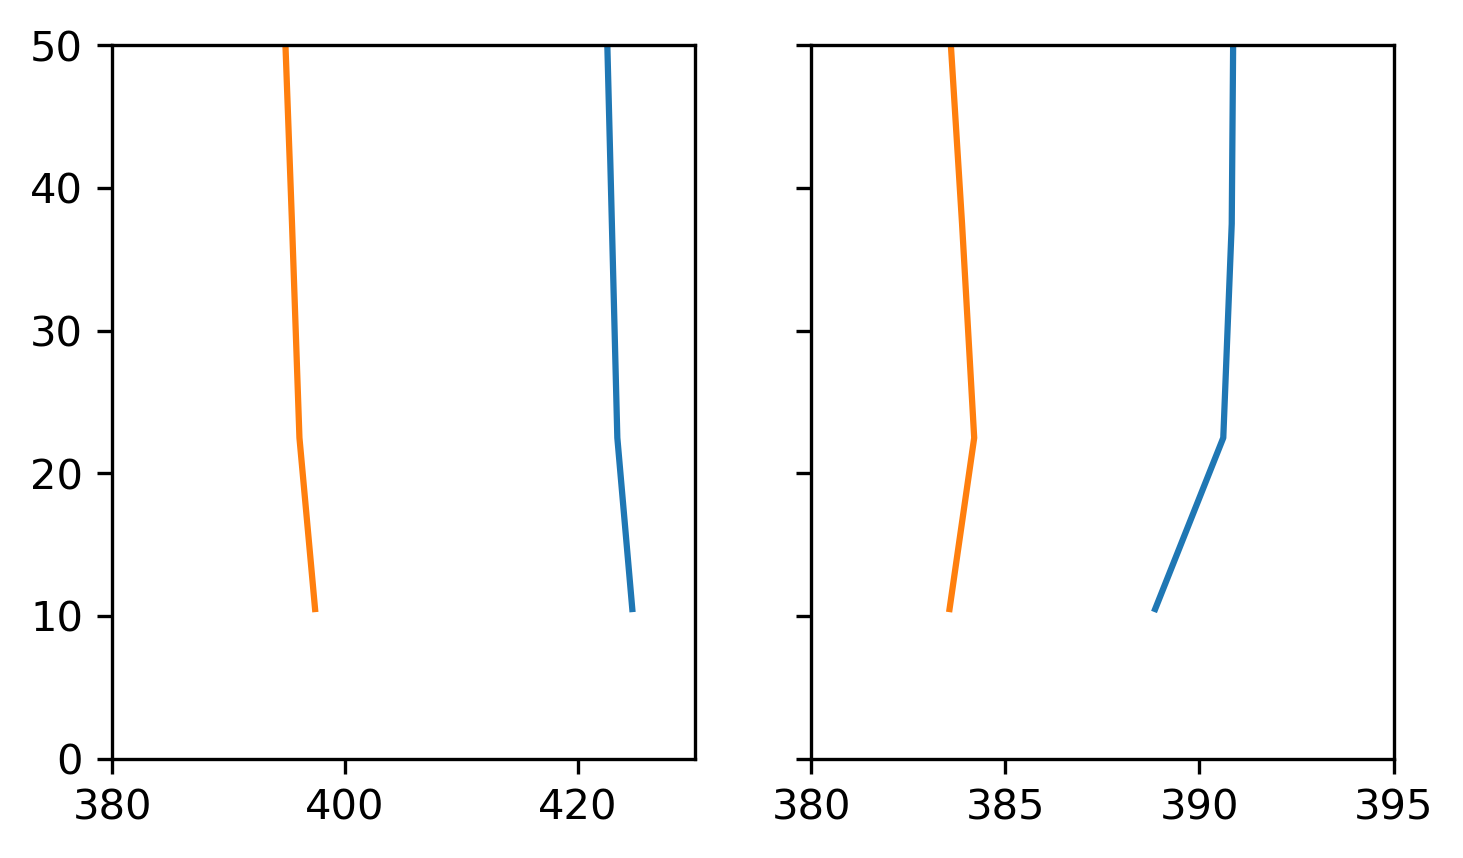

In [22]:
fig, axs = plt.subplots(ncols = 2,
                        nrows = 1,
                        sharex = False, sharey = True,
                        figsize=(14/2.54, (8)/2.54), dpi = 300)

#
axs[0].plot(f.RADLWUP, f.z, label = 'UP')
axs[0].plot(f.RADLWDN, f.z, label = 'DN')

axs[0].set_ylim([0., 50])
axs[0].set_xlim([380., 430])

#
axs[1].plot(f1.RADLWUP, f1.z, label = 'UP')
axs[1].plot(f1.RADLWDN, f1.z, label = 'DN')

axs[1].set_ylim([0., 50])
axs[1].set_xlim([380., 395])